# Singularities in Normal mixtures

In [1]:
using Turing, Plots, StatsPlots, Distributions, KernelDensity, PlotlyJS
using LaTeXStrings
# using Contour

┌ Info: Precompiling PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a]
└ @ Base loading.jl:1342
┌ Warning: Module ColorSchemes with build ID 2408126488693557 is missing from the cache.
│ This may mean ColorSchemes [35d6a980-a343-548e-a6ea-1d62b119f2f4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Warning: Module ColorSchemes with build ID 2408126488693557 is missing from the cache.
│ This may mean ColorSchemes [35d6a980-a343-548e-a6ea-1d62b119f2f4] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Info: Skipping precompilation since __precompile__(false). Importing PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a].
└ @ Base loading.jl:1047
┌ Warning: Replacing module `ColorSchemes`
└ @ Base loading.jl:959


WebIO._IJuliaInit()

In [2]:
@model normal_mixture(y) = begin
    a ~ Uniform(0, 1)
    b ~ Uniform(0, 1)
    mixture = MixtureModel(
        Normal[
            Normal(0, 1.0),
            Normal(b, 1.0)
            ], 
        [1 - a, a]
    )
    y ~ filldist(mixture, length(y))
end;

@model plain_normal(y) = begin
    μ ~ Uniform(0, 2)
    σ ~ Uniform(0, 2)
    y ~ filldist(Normal(μ, σ), length(y))
end;

function mcmc_chain(truth, model, N, chain_length)
    data = rand(truth_dist, N)
    sample(model(data), MH(), chain_length);
end;


function plot_chains(chains, plotrange, μ, σ)
    axis_min = first(plotrange)
    axis_max = last(plotrange)

    plots = []
    for chain in chains
        p = StatsPlots.plot(
            kde(
                (chain.value.data[:, 1, 1], chain.value.data[:, 2, 1]), 
                (plotrange, plotrange); 
            ), 
            legend=false, xlim=(axis_min, axis_max), ylim=(axis_min, axis_max)
        )
        scatter!(p, [μ], [σ]; markercolor="white", markershape=:diamond, markersize=5, markerstrokewidth=2)
        push!(plots, p)

    end
    plots
end;


Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01


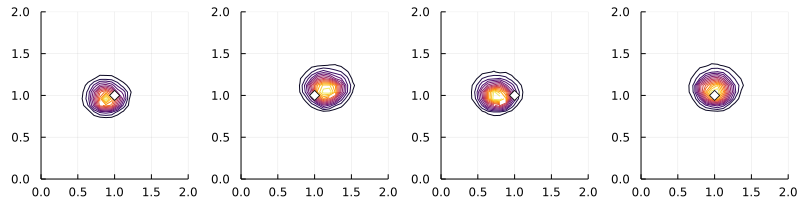

In [3]:
μₒ, σₒ = (1, 1)
truth_dist = Normal(μₒ, σₒ)
N = 50
normal_chains = [mcmc_chain(truth_dist, plain_normal, N, 100000) for i in 1:4]

axis_min = -0
axis_max = 2
ϵ = 0.08
plotrange = axis_min:ϵ:axis_max

# plots = []

# for chain in chains
#     p = StatsPlots.plot(
#         kde(
#             (chain.value.data[:, 1, 1], chain.value.data[:, 2, 1]), 
#             (plotrange, plotrange); 
#         ), 
#         legend=false, xlim=(axis_min, axis_max), ylim=(axis_min, axis_max)
#     )
#     scatter!(p, [μₒ], [σₒ]; fillcolor="white")
#     push!(plots, p)
    
# end

plots1 = plot_chains(normal_chains, plotrange, μₒ, σₒ)
p = Plots.plot(plots1..., layouts=(1, 4), size=(800, 200))

# Plots.savefig("/home/edmund/Desktop/phd_research/confirmation/images/mcmc_results_guassian_N=$N.png")
p

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


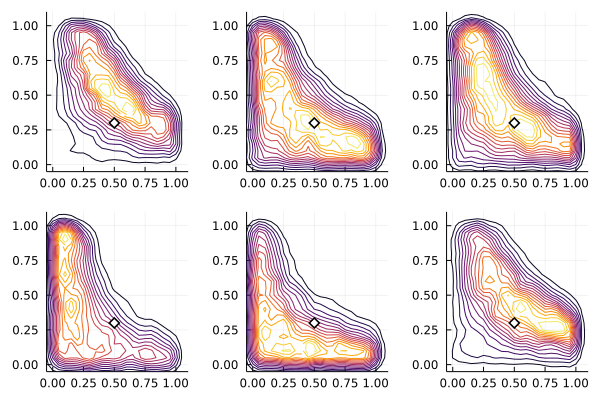

In [4]:
aₒ, bₒ = (0.5, 0.3)
truth_dist = MixtureModel(
        Normal[
            Normal(0.0, 1.0),
            Normal(bₒ, 1.0)
            ], 
        [1 - aₒ, aₒ]
    )


N = 100
mixture_chains_small = [mcmc_chain(truth_dist, normal_mixture, N, 10000) for i in 1:6]
# plots = [
#     StatsPlots.plot(kde(chain.value.data[:, 1:2, 1]), legend=false, xlim=(0, 1.05), ylim=(0, 1.05))
#     for chain in chains
# ]

axis_min = -0.05
axis_max = 1.1
ϵ = 0.05
plotrange = axis_min:ϵ:axis_max

plots2 = plot_chains(mixture_chains_small, plotrange, aₒ, bₒ)
Plots.plot(plots2...)

# Plots.savefig("normal-mixture-a=05-b=0.3-N=1000.png")

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:06
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:07
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:08
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:08
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:08


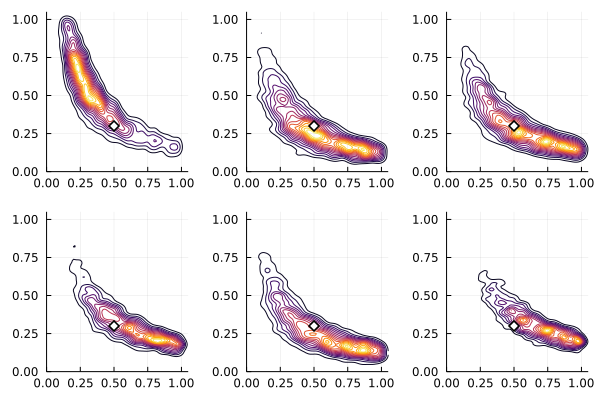

In [5]:
N = 1000
mixture_chains_big = [mcmc_chain(truth_dist, normal_mixture, N, 15000) for i in 1:6]
# plots = [
#     StatsPlots.plot(kde(chain.value.data[:, 1:2, 1]), legend=false, xlim=(0, 1.05), ylim=(0, 1.05))
#     for chain in chains
# ]
axis_min = -0
axis_max = 1.05
ϵ = 0.01
plotrange = axis_min:ϵ:axis_max

plots3 = plot_chains(mixture_chains_big, plotrange, aₒ, bₒ)
Plots.plot(plots3...)
# Plots.savefig("normal-mixture-a=05-b=0.3-N=5000.png")

In [6]:
p = Plots.plot(cat(plots1, plots2, plots3, dims=1)..., layouts=(3, 6))
Plots.plot!(p, size=(1200, 600))
# Plots.savefig("/home/edmund/Desktop/phd_research/confirmation/images/mcmc-simulation.png")
p

LoadError: When doing layout, n (18) != n_override (16).  You're probably trying to force existing plots into a layout that doesn't fit them.

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:10
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:08
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:09
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:08


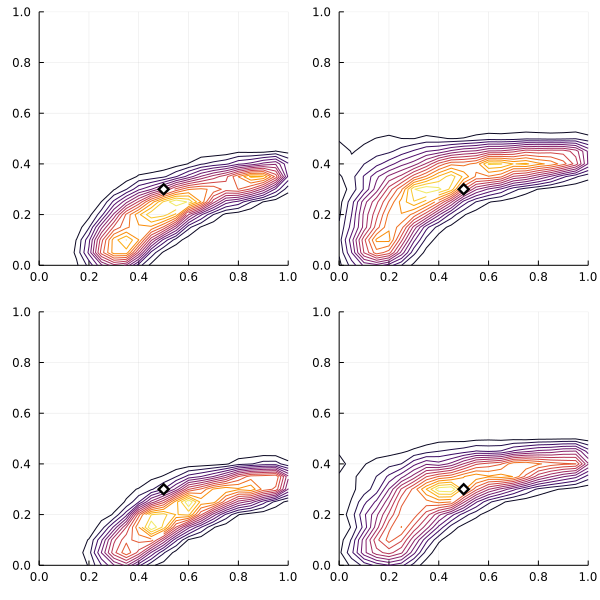

In [7]:
aₒ, bₒ = (0.5, 0.3)
truth_dist = MixtureModel(
        Normal[
            Normal(1/2, 1.0),
            Normal(bₒ, 1.0)
            ], 
        [1 - aₒ, aₒ]
    )

@model equal_normal_mixture(y) = begin
    a ~ Uniform(0, 1)
    b ~ Uniform(0, 1)
    mixture = MixtureModel(
        Normal[
            Normal(1/2, 1.0),
            Normal(b, 1.0)
            ], 
        [1 - a, a]
    )
    y ~ filldist(mixture, length(y))
end;

N = 1000
chains = [mcmc_chain(truth_dist, equal_normal_mixture, N, 15000) for i in 1:4]
# plots = [
#     StatsPlots.plot(kde(chain.value.data[:, 1:2, 1]), legend=false, xlim=(0, 1.05), ylim=(0, 1.05))
#     for chain in chains
# ]

amin = 0
amax = 1

bmin = 0
bmax = 1
ϵ = 0.05

plots = []
for chain in chains
    p = StatsPlots.plot(
        kde(
            (chain.value.data[:, 1, 1], chain.value.data[:, 2, 1]), 
            (amin:ϵ:amax, bmin:ϵ:bmax); 
        ), 
        legend=false, xlim=(amin, amax), ylim=(bmin, bmax)
    )
    scatter!(p, [aₒ], [bₒ]; markercolor="white", markershape=:diamond, markersize=5, markerstrokewidth=2)
    push!(plots, p)

end

Plots.plot(plots...)
Plots.plot!(size=(600, 600))

# Singular case: $tanh$-regression

In [8]:


@model tanh_regression(x, y) = begin
    a ~ Uniform(-1, 1)
    b ~ Uniform(-1, 1)
    x ~ filldist(Uniform(-1, 1), length(x))
    for i in eachindex(y)
        y[i] ~ Normal(a * tanh(b * x[i]), 1.0)
    end
end;




# aₒ, bₒ = (0.0, 0.5)
# N = 5000

amin = -1.2
amax = 1.2
bmin = -1.2
bmax = 1.2
ϵ = 0.05
bₒ = 0.5
plots = []
for aₒ in [0.5, 0.2, 0.1, 0.0]
    for N in [500, 5000]
#         chains = [sample(tanh_regression(x, y), MH(), 20000) for i in 1:2]
        # plots = [
        #     StatsPlots.plot(kde(chain.value.data[:, 1:2, 1]), legend=false, xlim=(0, 1.05), ylim=(0, 1.05))
        #     for chain in chains
        # ]

        for i in 1:2
            x = rand(Uniform(-1, 1), N)
            y = [rand(Normal(aₒ * tanh(bₒ * xval), 1.0)) for xval in x]
            data = (x, y)
            chain = sample(tanh_regression(x, y), MH(), 20000)

            p = StatsPlots.plot(
                kde(
                    (chain.value.data[:, 1, 1], chain.value.data[:, 2, 1]), 
                    (amin:ϵ:amax, bmin:ϵ:bmax); 
                ), 
                legend=false, xlim=(amin, amax), ylim=(bmin, bmax), tickfontsize=5
            )
            scatter!(p, [aₒ], [bₒ]; markercolor="white", markershape=:diamond, markersize=5, markerstrokewidth=2)
            Plots.title!(p, latexstring("a_0=$aₒ, b_0=$bₒ, N=$N"), titlefontsize=10)
            Plots.xlabel!(L"a", labelfontsize=6)
            Plots.ylabel!(L"b", labelfontsize=6)
            push!(plots, p)

        end
    end
end;


Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:05
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:04
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00
Sampling: 100%|█████████████████████████████████████████| Time: 

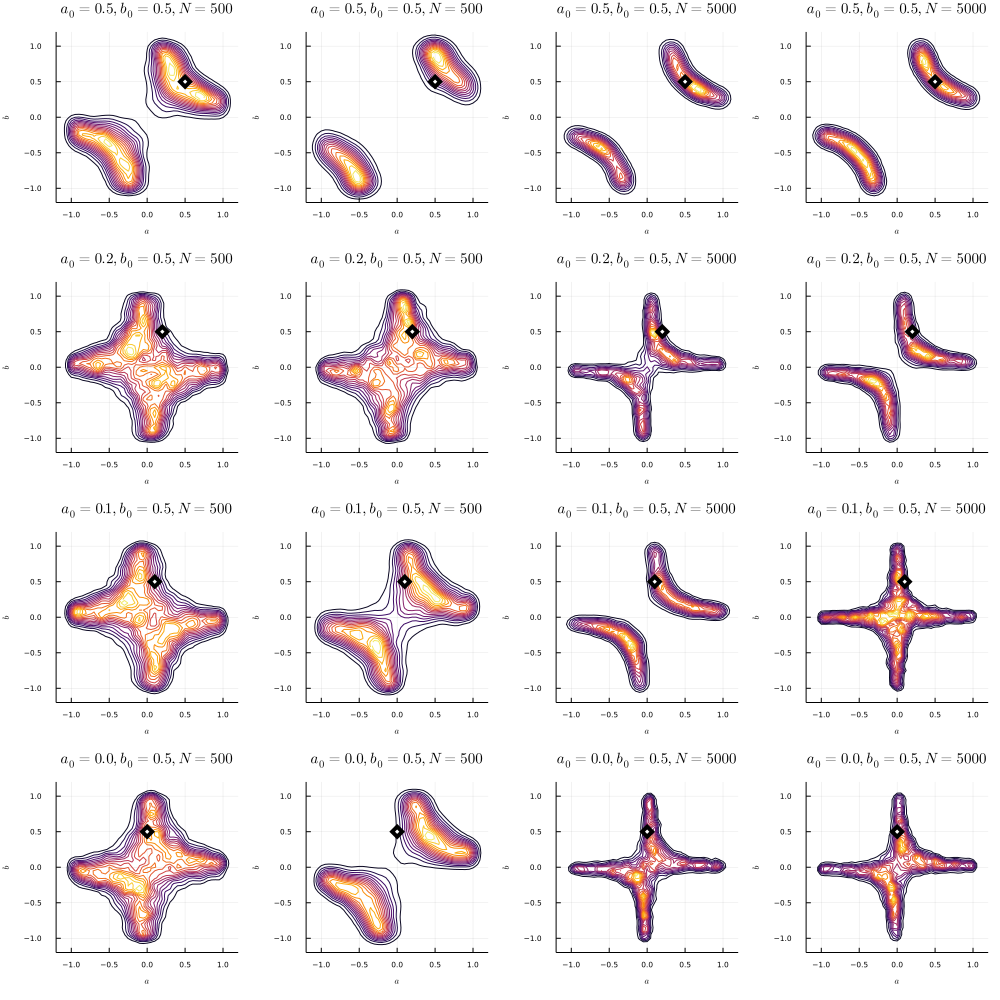

In [9]:
p = Plots.plot(plots..., layouts=(4, 4), size=(1000, 1000))
# Plots.savefig("/home/edmund/Desktop/phd_research/confirmation/images/mcmc-results-tanh-regression-model.png")
# p = Plots.plot(plots..., layouts=(2, 6), size=(1800, 600))
p 

# Singular case: $a^4 - a^2b + b^3 = 0$

In [10]:
f(a, b) = (a^4 - a^2 * b + b^3)
g(u, v) = (u, 3 * u * v)
ginv(a, b) = (a, b / (3 * a))
fg(u, v) = u^3 * (u - 3 * v + 27 * v^3)

σ = 1
@model singular_regression(x, y) = begin
    a ~ Uniform(-1/2, 1/2)
    b ~ Uniform(-1/2, 1/2)
    x ~ filldist(Uniform(-1, 1), length(x))
    for i in eachindex(y)
        y[i] ~ Normal( f(a, b) * x[i], σ)
    end
end;


@model desingularised_regression(x, y) = begin
    u ~ Uniform(-1/2, 1/2)
    v ~ Uniform(-1/2, 1/2)
    x ~ filldist(Uniform(-1, 1), length(x))
    for i in eachindex(y)
        y[i] ~ Normal( fg(u, v) * x[i], σ)
    end
end;



Sampling: 100%|█████████████████████████████████████████| Time: 0:01:26


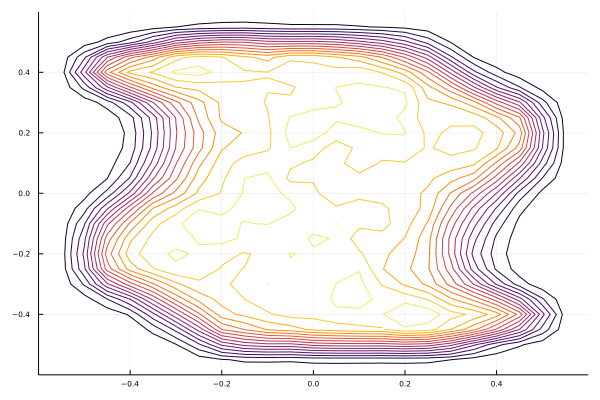

In [11]:


N = 4000
a₀, b₀ = 0, 0
x = rand(Uniform(-1, 1), N)
y = [rand(Normal((a₀^4 - a₀^2 * b₀ + b₀^3) * xval, σ)) for xval in x]

chain = sample(desingularised_regression(x, y), MH(), 50000)



amin, amax = -0.6, 0.6
bmin, bmax = -0.6, 0.6

ϵ = 0.05
p = StatsPlots.plot(
    kde(
        (chain.value.data[:, 1, 1], chain.value.data[:, 2, 1]), 
        (amin:ϵ:amax, bmin:ϵ:bmax); 
    ), 
    legend=false, xlim=(amin, amax), ylim=(bmin, bmax), tickfontsize=5
)

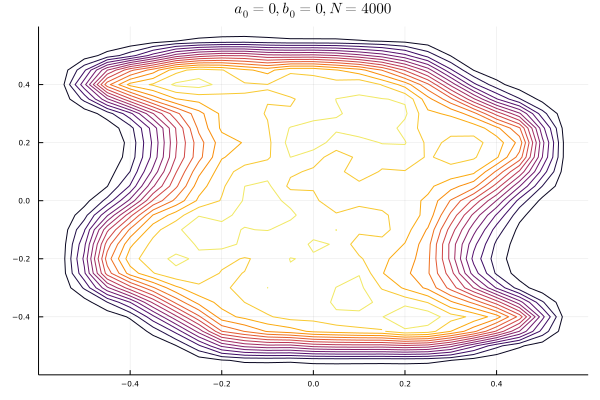

In [12]:
Plots.title!(p, latexstring("a_0=$a₀, b_0=$b₀, N=$N"), titlefontsize=10)
# Plots.savefig("desingularised-butterfly-posterior-a_0=$a₀-b_0=$b₀-N=$N.png")

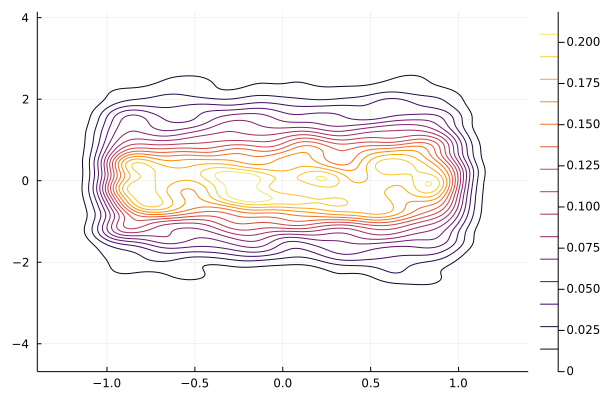

In [13]:
StatsPlots.plot(kde((x, y)))

In [14]:
N = 100000
T = 1
β = 1 / T
a₀, b₀ = 0, 0
x = rand(Uniform(-1, 1), N)
y = [rand(Normal(f(a₀, b₀) * xval, σ)) for xval in x]
nloglikelihood(a, b) = 1 / (2 * σ^2) * (mean((y .- f(a, b) .* x).^2) - mean((y .- f(a₀, b₀) .* x).^2))
likelihood(a, b) = exp(-N * β * nloglikelihood(a, b))

desingularised_nloglikelihood(u, v) = 1 / (2 * σ^2) * (mean((y .- fg(u, v) .* x).^2) - mean((y .- fg(0, 0) .* x).^2))
desingularised_likelihood(u, v) = exp(-N * β * desingularised_nloglikelihood(u, v))



desingularised_likelihood (generic function with 1 method)

0.0 
 1.025489028754335

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/edmund/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513
┌ Warning: Multiple series with different line color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/edmund/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513


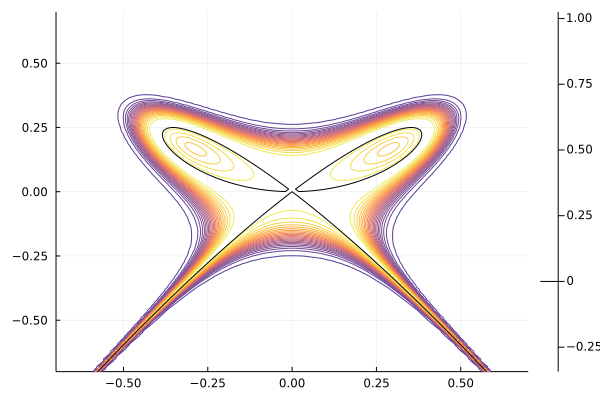

┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/edmund/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513


In [15]:
ϵ = 0.01
t = 0.7
a = collect(-t:ϵ:t)
b = collect(-t:ϵ:t)


l = likelihood.(a, b)
lmin, lmax = minimum(l), maximum(l)
print("$lmin \n $lmax")
p = Plots.contour(a, b, likelihood, levels=30, seriescolor=:thermal)
Plots.contour!(p, a, b, f, levels=[f(a₀, b₀)], c=:black)

# Plots.savefig(p, "singular-posterior-a0=$a₀-b0=$b₀-N=$N.png")
p

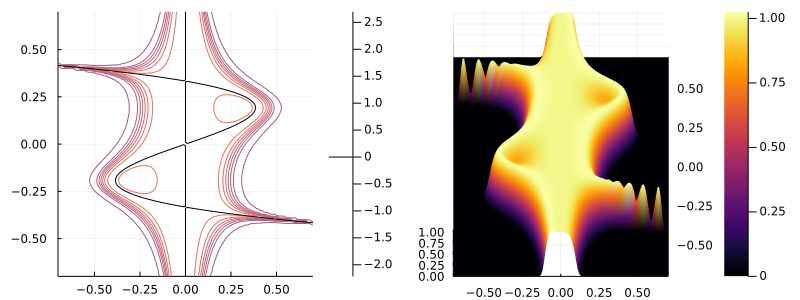

┌ Warning: Multiple series with different color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/edmund/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513
┌ Warning: Multiple series with different line color share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/edmund/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513
┌ Warning: Multiple series with different levels share a colorbar. Colorbar may not reflect all series correctly.
└ @ Plots /home/edmund/.julia/packages/Plots/AJMX6/src/backends/gr.jl:513


In [19]:
p = Plots.contour(a, b, desingularised_likelihood, levels=30, seriescolor=:thermal, fill=false)
Plots.contour!(p, a, b, fg, levels=[0], c=:black)
p2 = Plots.surface(a, b, desingularised_likelihood, camera=(0, 80))

Plots.plot(p, p2, size=(800, 300))
# Plots.savefig(p, "desingularised-posterior-a0=$a₀-b0=$b₀-N=$N.png")
# Plots.plot(p, size=(1000, 800))

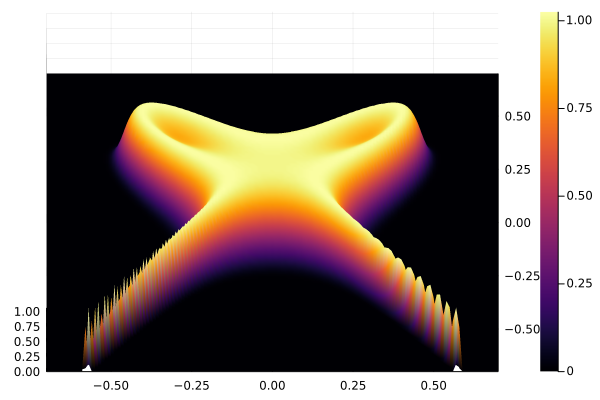

In [17]:
p = Plots.surface(a, b, likelihood, camera=(0, 80))
# Plots.savefig(p, "singular-poseterior-surface-a0=$a₀-b0=$b₀-N=$N.png")
p

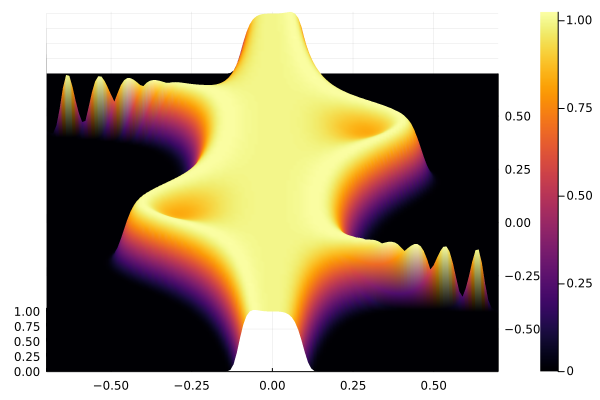

In [18]:
p = Plots.surface(a, b, desingularised_likelihood, camera=(0, 80))
# Plots.savefig(p, "desingularised-poseterior-surface-a0=$a₀-b0=$b₀-N=$N.png")
p